In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [4]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         horizontal_flip = True,
                                         zoom_range = 0.2)

val_datagen = image.ImageDataGenerator(rescale=1./255)

In [5]:
training_data = train_datagen.flow_from_directory('/content/drive/MyDrive/PBL_VII_SEM/Covid Detection/Train',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)

val_data = val_datagen.flow_from_directory('/content/drive/MyDrive/PBL_VII_SEM/Covid Detection/Val',
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 282 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [6]:
training_data.class_indices

{'COVID': 0, 'NORMAL': 1}

In [7]:
e = 20
hist = model.fit(training_data,
                    steps_per_epoch=8,
                    epochs = e,
                    validation_data = val_data,
                    validation_steps = 2)
model.save('covid.h5')

Epoch 1/20
8/8 [==============================] - 120s 13s/step - loss: 1.3206 - accuracy: 0.5312 - val_loss: 0.6894 - val_accuracy: 0.5312
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 0.6635 - accuracy: 0.5960 - val_loss: 0.6422 - val_accuracy: 0.8750
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.5506 - accuracy: 0.7040 - val_loss: 0.4514 - val_accuracy: 0.8906
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 0.3534 - accuracy: 0.8480 - val_loss: 0.3160 - val_accuracy: 0.8750
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.4009 - accuracy: 0.8400 - val_loss: 0.4095 - val_accuracy: 0.8750
Epoch 6/20
8/8 [==============================] - 9s 1s/step - loss: 0.2733 - accuracy: 0.8920 - val_loss: 0.1921 - val_accuracy: 0.9219
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.2239 - accuracy: 0.9240 - val_loss: 0.2250 - val_accuracy: 0.9531
Epoch 8/20
8/8 [=================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


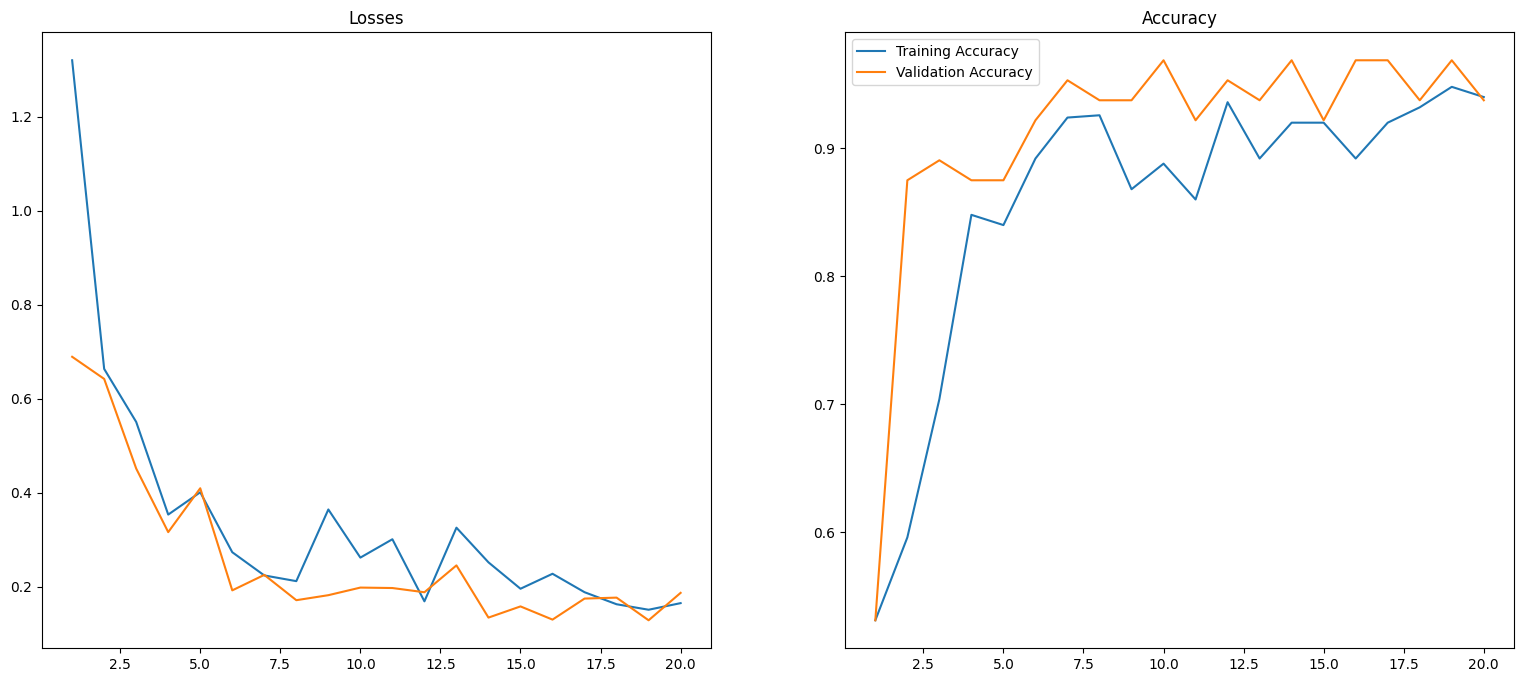

In [8]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,e+1)

plt.figure(figsize=(19,8))
plt.subplot(121)
plt.plot(epochs,train_loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Losses')

plt.subplot(122)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Accuracy')

plt.legend()

In [9]:
model.evaluate_generator(training_data)

<ipython-input-9-3d402a6de896>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(training_data)


[0.12413986772298813, 0.9432623982429504]

In [10]:
model.evaluate_generator(val_data)

<ipython-input-10-79d23f36e8bf>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_data)


[0.16064812242984772, 0.949999988079071]

### Testing

In [25]:
import cv2
import os
import seaborn as sns
from tensorflow.keras.models import load_model

TP = 0
TN = 0
FP = 0
FN = 0

model = load_model('/content/covid.h5')

covid_images = os.listdir('/content/drive/MyDrive/PBL_VII_SEM/Covid Detection/Test/COVID')
normal_images = os.listdir('/content/drive/MyDrive/PBL_VII_SEM/Covid Detection/Test/NORMAL')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [27]:
covid_images

['152.jpg',
 '144.jpg',
 '141.jpg',
 '153.jpg',
 '149.jpg',
 '154.jpg',
 '146.jpg',
 '155.jpg',
 '145.jpg',
 '143.jpg',
 '150.jpg',
 '151.jpg',
 '142.jpg',
 '148.jpg',
 '147.jpg']

1/1 [==============================] - 0s 20ms/step


<Axes: >

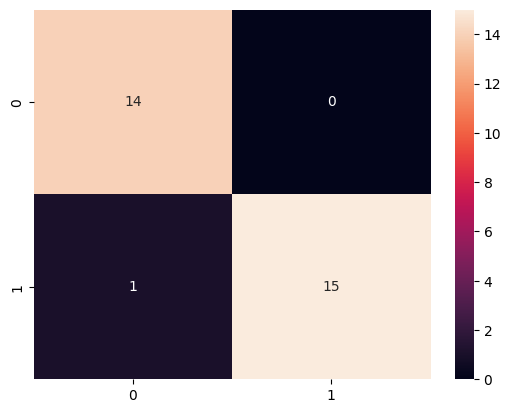

In [28]:

for i in covid_images:
    img = cv2.imread('/content/drive/MyDrive/PBL_VII_SEM/Covid Detection/Test/COVID/'+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred<0.5:
      TP+=1
    else:
      FN+=1

for i in normal_images:
    img = cv2.imread('/content/drive/MyDrive/PBL_VII_SEM/Covid Detection/Test/NORMAL/'+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred>0.5:
      TN+=1
    else:
      FP+=1

sns.heatmap([[TP,FP],[FN,TN]],annot=True)